In [1]:
import random

In [2]:
import random

# 랜덤 배열 생성 함수
def makeRandomList(arr_size):
    arr = list(0 for i in range(arr_size))
    for i in range(arr_size):
        arr[i] = random.randint(0, 100)
    return arr

# 배열 출력 함수
def printArr(arr):
    for i in range(len(arr)):
        print(arr[i], end=" ")
    print()

# 병합 정렬 함수
def mergeSort(arr):
    if len(arr) <= 1:
        return arr
    
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    
    left = mergeSort(left)
    right = mergeSort(right)
    
    return merge(left, right)

# 병합 함수
def merge(left, right):
    result = []
    i, j = 0, 0
    
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
            
    result += left[i:]
    result += right[j:]
    
    return result

# 테스트 코드
if __name__ == "__main__":
    arr_size = 10  # 배열 크기
    arr = makeRandomList(arr_size)
    print("Original array:")
    printArr(arr)
    
    sorted_arr = mergeSort(arr)
    print("Sorted array:")
    printArr(sorted_arr)


Original array:
18 86 7 9 96 79 85 19 76 9 
Sorted array:
7 9 9 18 19 76 79 85 86 96 


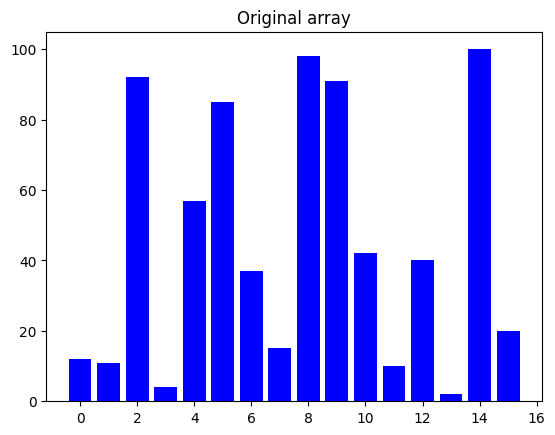

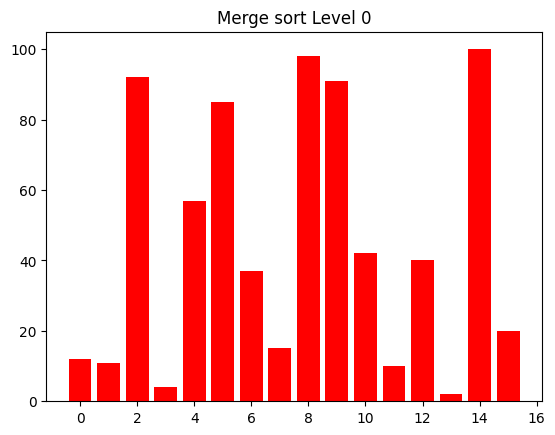

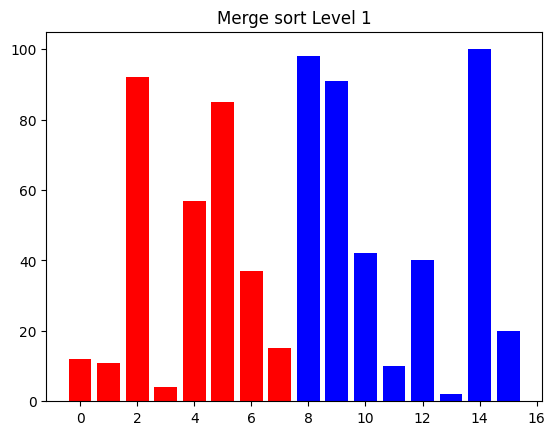

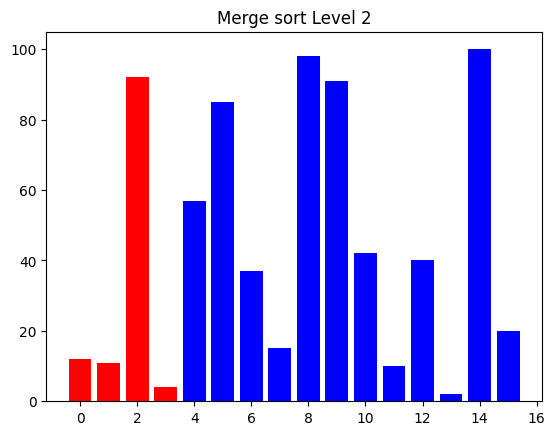

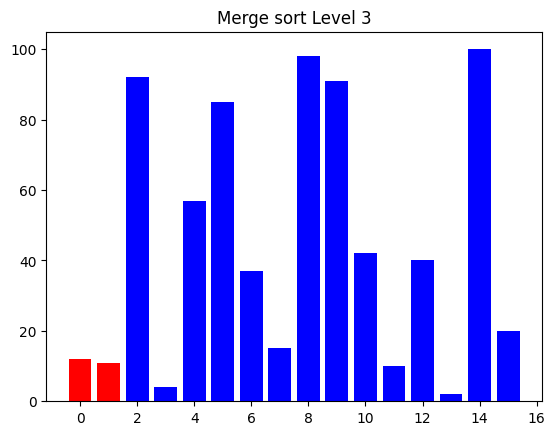

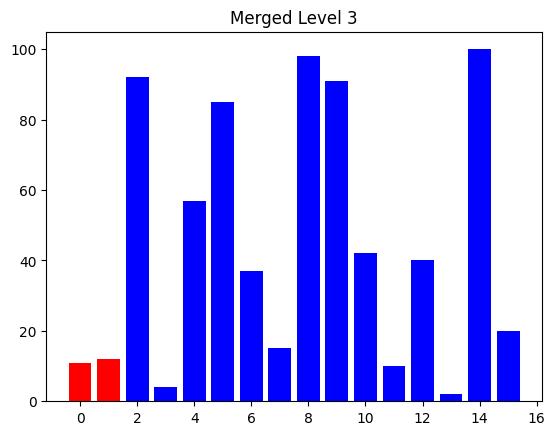

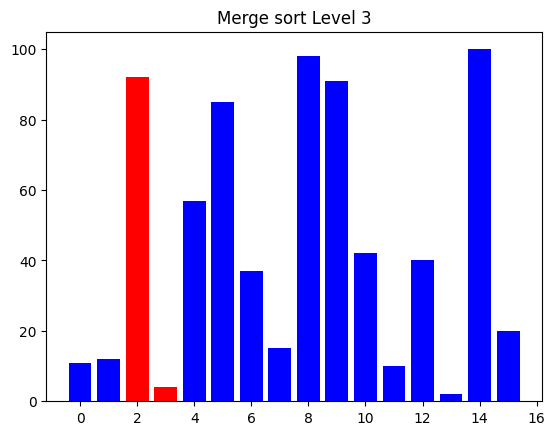

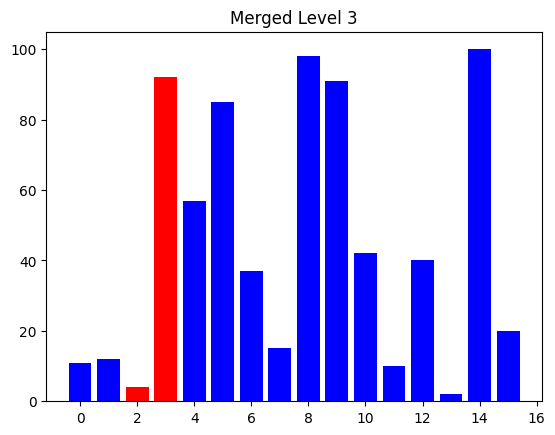

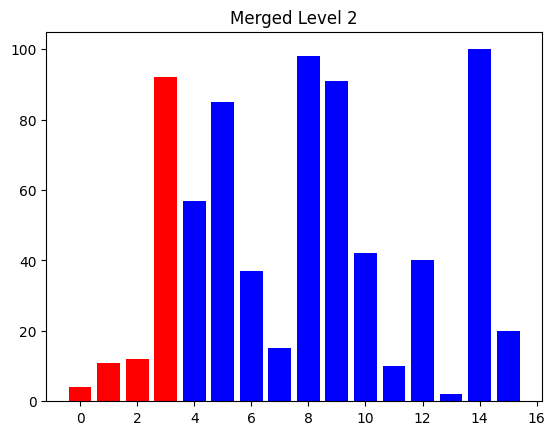

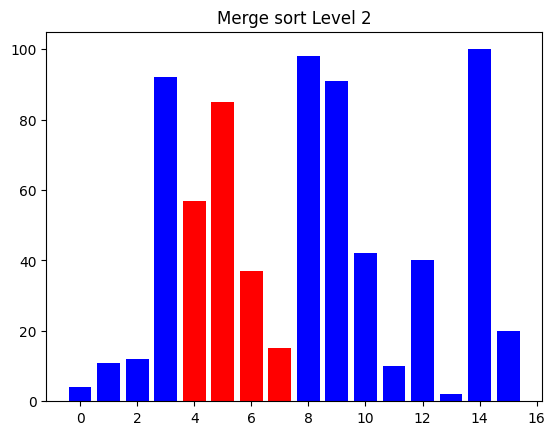

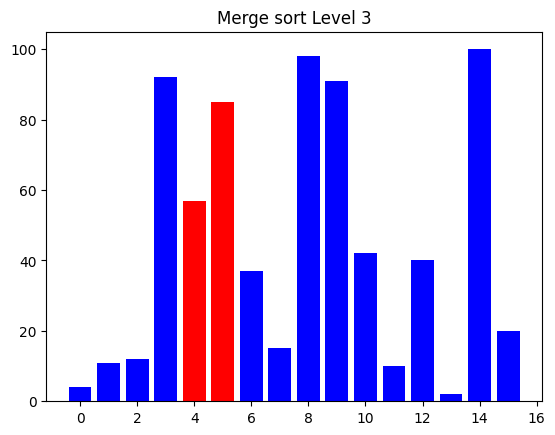

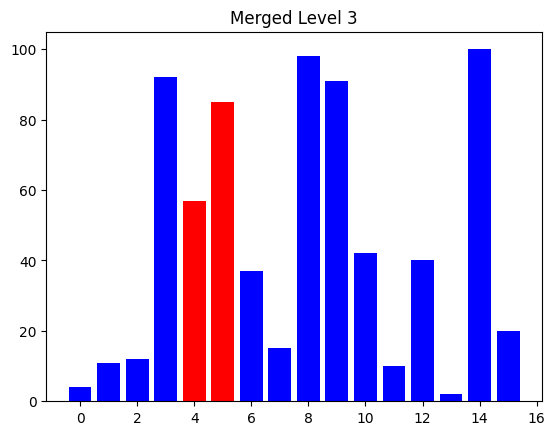

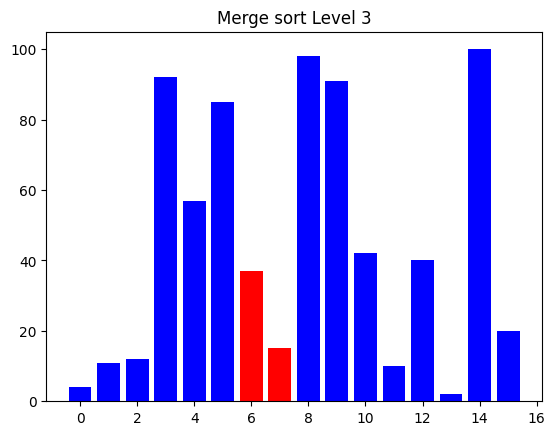

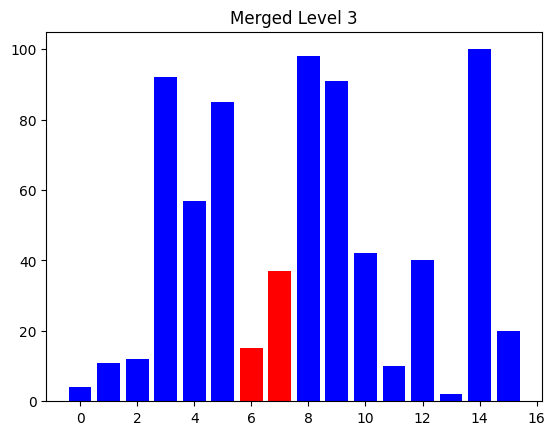

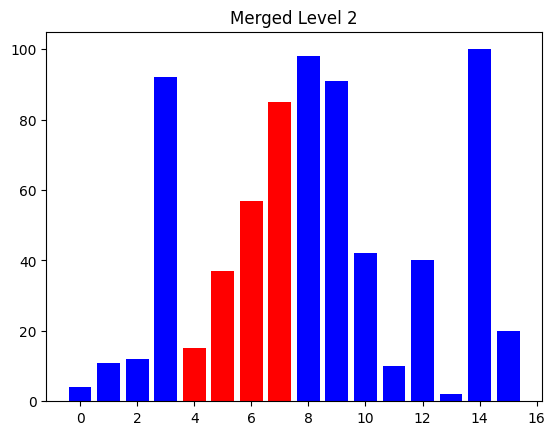

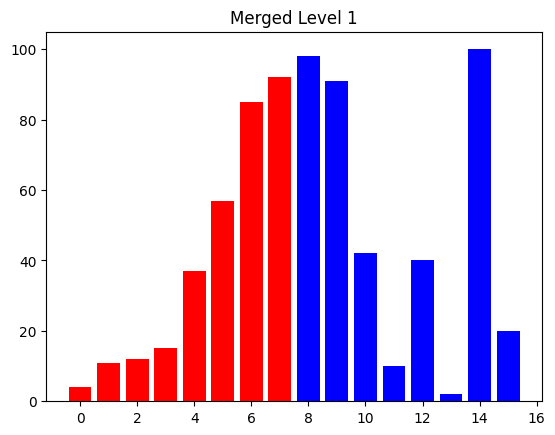

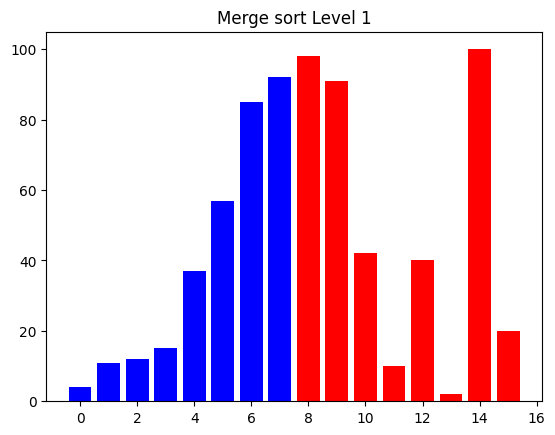

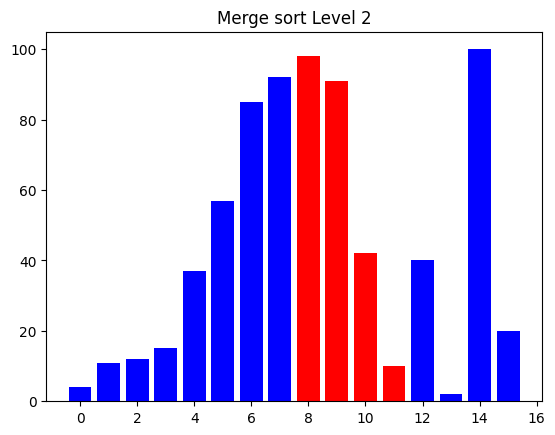

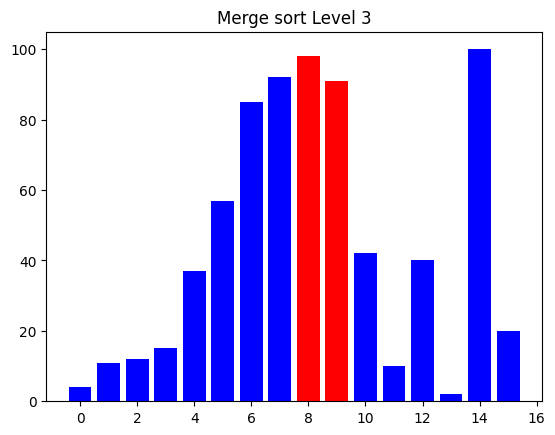

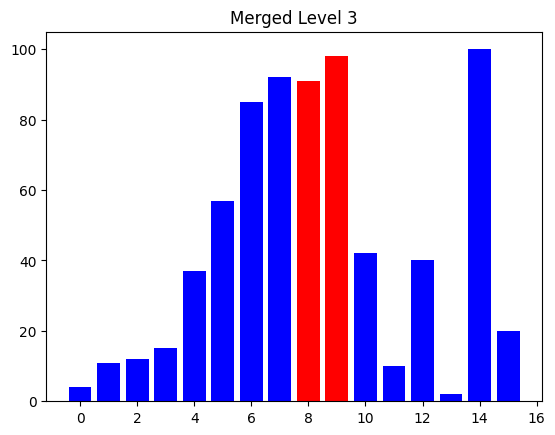

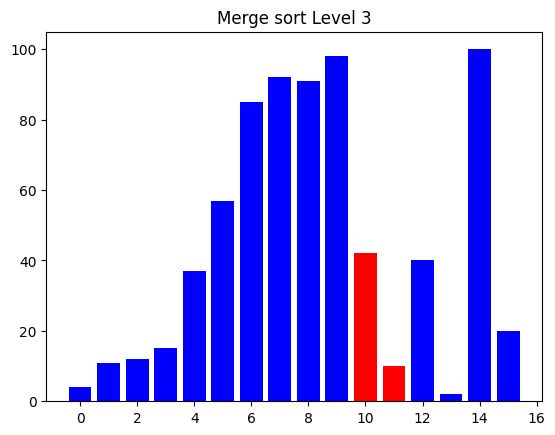

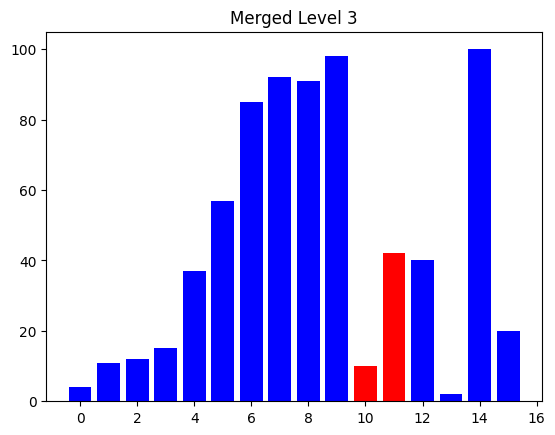

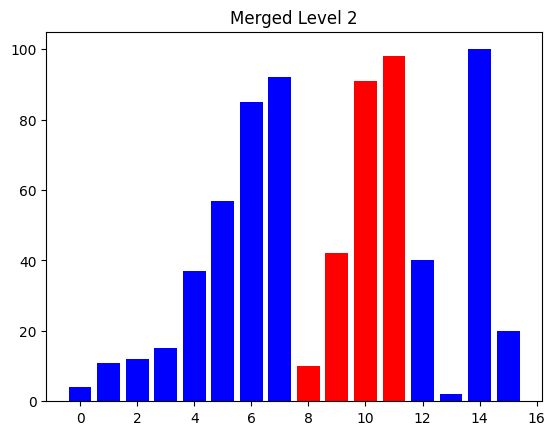

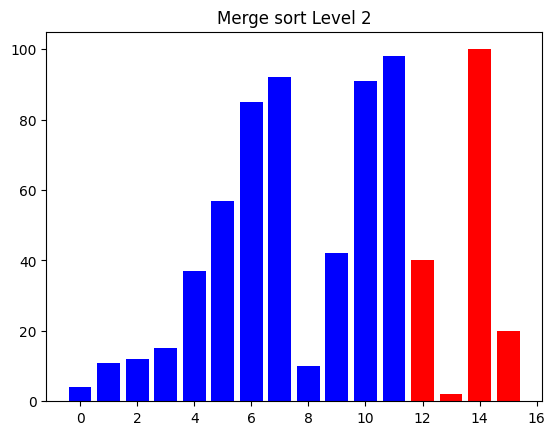

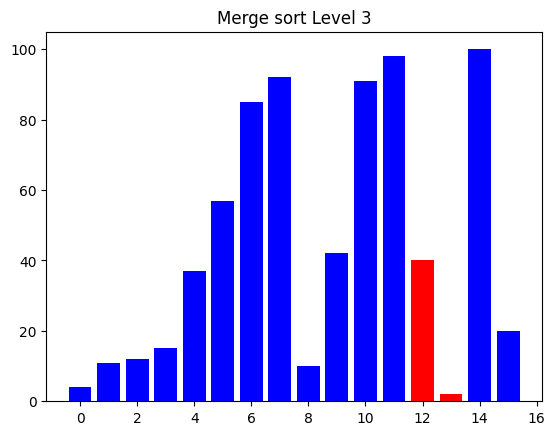

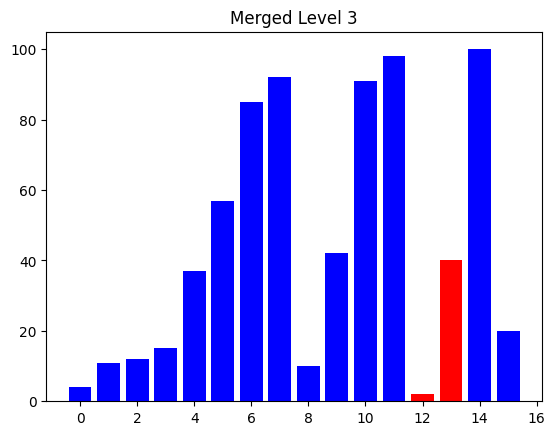

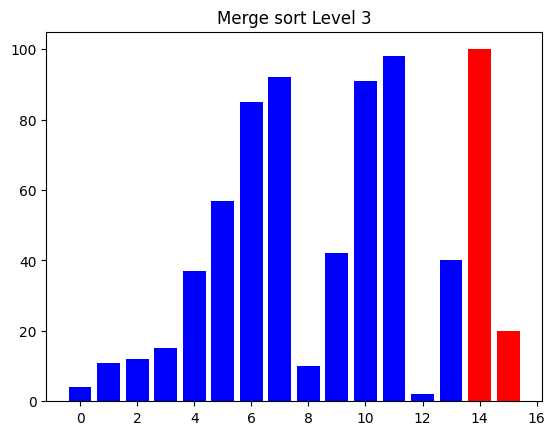

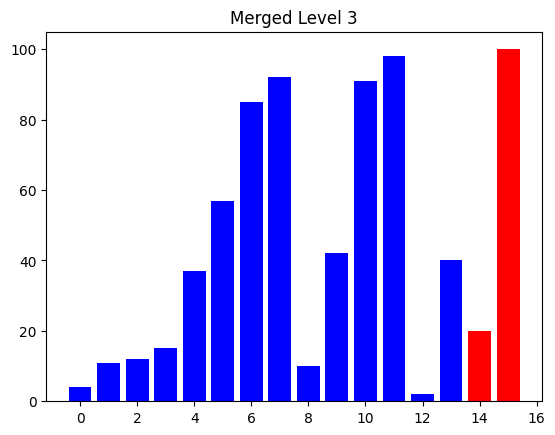

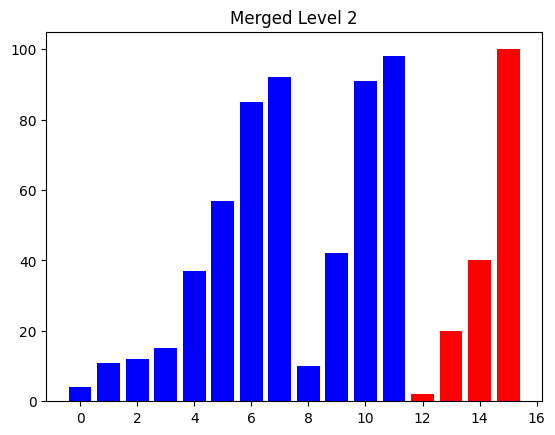

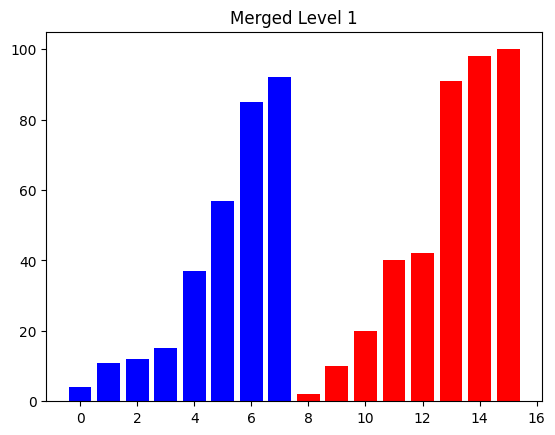

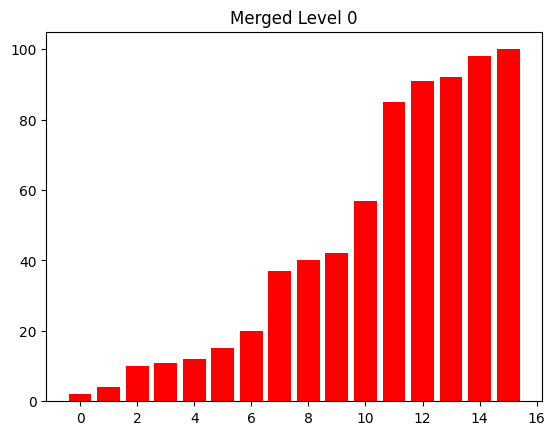

In [7]:
import random
import matplotlib.pyplot as plt

def makeRandomList(arr_size):
    arr = [0 for _ in range(arr_size)]
    for i in range(arr_size):
        arr[i] = random.randint(0, 100)
    return arr

def plotArr(full_arr, focus_indices, title):
    plt.clf()
    colors = ['b' if i not in focus_indices else 'r' for i in range(len(full_arr))]
    plt.bar(range(len(full_arr)), full_arr, color=colors)
    plt.title(title)
    plt.draw()
    plt.pause(0.5)

def mergeSort(arr, start=0, end=None, level=0, full_arr=None):
    if full_arr is None:
        full_arr = arr.copy()
    
    if end is None:
        end = len(arr)

    if len(arr) <= 1:
        return arr

    plotArr(full_arr, list(range(start, end)), f"Merge sort Level {level}")

    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    left = mergeSort(left, start, start + mid, level + 1, full_arr)
    right = mergeSort(right, start + mid, end, level + 1, full_arr)

    merged_arr = merge(left, right, start, full_arr, level)
    full_arr[start:end] = merged_arr
    plotArr(full_arr, list(range(start, end)), f"Merged Level {level}")
    return merged_arr

def merge(left, right, start, full_arr, level=0):
    result = []
    i, j = 0, 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result += left[i:]
    result += right[j:]

    full_arr[start:start + len(result)] = result
    return result

if __name__ == "__main__":
    plt.ion()
    arr_size = 16
    arr = makeRandomList(arr_size)
    plotArr(arr, [], "Original array")
    
    sorted_arr = mergeSort(arr)
    plt.show()
